Last updated: 15 Feb 2023

# 👋 PyCaret Abalone Regression

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [39]:
!pip install pycaret

In [40]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.2.0'

In [41]:
# Next, install ucimlrepo for downloading the Abalone dataset
!pip install ucimlrepo

# 🚀 Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

In [42]:
### load sample dataset from ucimlrepo module
from ucimlrepo import fetch_ucirepo
abalone = fetch_ucirepo(id=1)

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [60]:
# First combine features and target into one dataframe for pycaret
import pandas as pd

# Create a target "Age" (= "Rings" + 1.5)
abalone.data.targets["Age"] = abalone.data.targets["Rings"] + 1.5

data = pd.concat([abalone.data.features, abalone.data.targets["Age"]], axis=1)
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [61]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = "Age", session_id = 123)

,Description,Value
0,Session id,123
1,Target,Age
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [62]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5180,4.6209,2.1471,0.5550,0.1523,0.1287,0.4700
rf,Random Forest Regressor,1.5419,4.7189,2.1701,0.5450,0.1546,0.1310,1.3500
lightgbm,Light Gradient Boosting Machine,1.5532,4.8000,2.1878,0.5382,0.1551,0.1311,0.8000
et,Extra Trees Regressor,1.5553,4.7921,2.1876,0.5381,0.1557,0.1321,0.8390
ridge,Ridge Regression,1.5970,4.9139,2.2152,0.5275,0.1602,0.1365,0.0700
br,Bayesian Ridge,1.5983,5.0029,2.2342,0.5182,0.1630,0.1367,0.1230
knn,K Neighbors Regressor,1.5709,5.0283,2.2408,0.5160,0.1586,0.1309,0.0790
lr,Linear Regression,1.5998,5.0267,2.2391,0.5158,0.1634,0.1367,0.7410
huber,Huber Regressor,1.5654,5.0520,2.2461,0.5144,0.1599,0.1294,0.1730
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1614,0.1360,0.1840


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

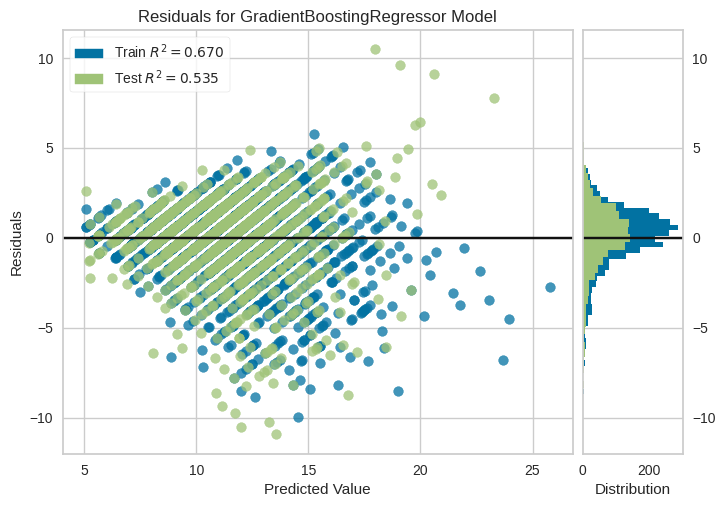

In [63]:
# plot residuals
plot_model(best, plot = 'residuals')

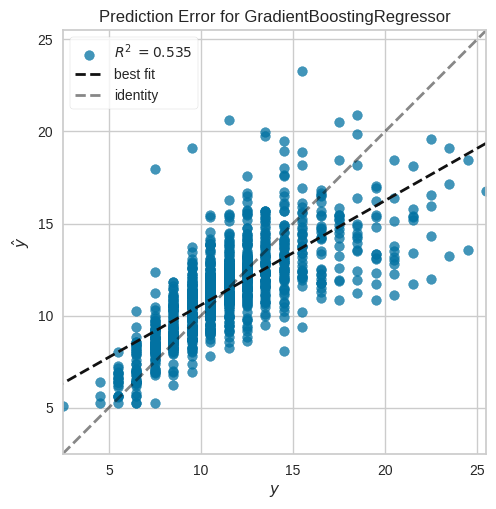

In [64]:
# plot error
plot_model(best, plot = 'error')

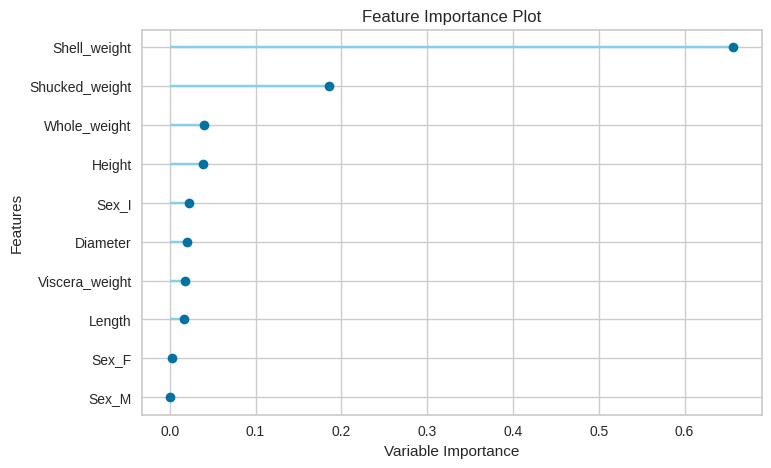

In [65]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [66]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [67]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.5104,4.7388,2.1769,0.5352,0.1556,0.1292


In [68]:
# show predictions df
holdout_pred.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age,prediction_label
2812,I,0.240,0.170,0.050,0.0545,0.0205,0.0160,0.0155,6.5,6.399739
1344,M,0.585,0.470,0.165,1.4090,0.8000,0.2290,0.2950,11.5,11.070432
533,F,0.435,0.335,0.110,0.3800,0.1695,0.0860,0.1100,10.5,10.570209
866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.3250,10.5,14.183058
3939,M,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,15.5,13.756941


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Age`. We can then use the new data frame without labels for scoring.

In [69]:
# copy data and drop charges

new_data = data.copy()
new_data.drop('Age', axis=1, inplace=True)
new_data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [70]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,prediction_label
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,10.835602
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,9.454607
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,11.964184
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.239941
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.228381


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [71]:
# save pipeline
save_model(best, "kevin_abalone_pipeline")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Sex'],
                                     transformer=OneHotEncoder(cols=['Sex'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('trained_model', GradientBoostingRegressor(random_state=123))])

In [72]:
# load pipeline
loaded_best_pipeline = load_model("kevin_abalone_pipeline")
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Sex'],
                                    transformer=OneHotEncoder(cols=['Sex'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', GradientBoostingRegressor(random_state=123))])

# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [73]:
s = setup(data, target = 'Age', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Age
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [74]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [75]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Sex_I,Sex_M,Sex_F,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
112,1.0,0.0,0.0,0.435,0.320,0.080,0.3325,0.1485,0.0635,0.1050
2979,0.0,1.0,0.0,0.490,0.355,0.155,0.9810,0.4650,0.2015,0.2505
1715,0.0,1.0,0.0,0.645,0.485,0.150,1.2215,0.5695,0.2735,0.3300
3548,0.0,0.0,1.0,0.495,0.370,0.120,0.5940,0.2800,0.1100,0.1375
3911,1.0,0.0,0.0,0.355,0.270,0.100,0.2160,0.0830,0.0370,0.0750
...,...,...,...,...,...,...,...,...,...,...
1593,1.0,0.0,0.0,0.525,0.380,0.135,0.6150,0.2610,0.1590,0.1750
4060,1.0,0.0,0.0,0.545,0.405,0.130,0.6580,0.3270,0.1445,0.1740
1346,0.0,1.0,0.0,0.585,0.450,0.180,0.7995,0.3360,0.1855,0.2370
3454,0.0,0.0,1.0,0.575,0.460,0.165,1.0650,0.4985,0.2145,0.2815


In [76]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [ ]:
# help(setup)

In [77]:
# init setup with normalize = True
s = setup(data, target = 'Age', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Age
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


<AxesSubplot: >

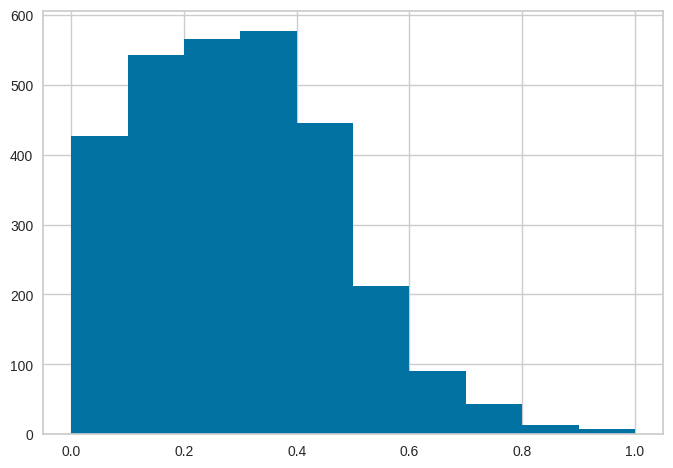

In [83]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Whole_weight'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<AxesSubplot: >

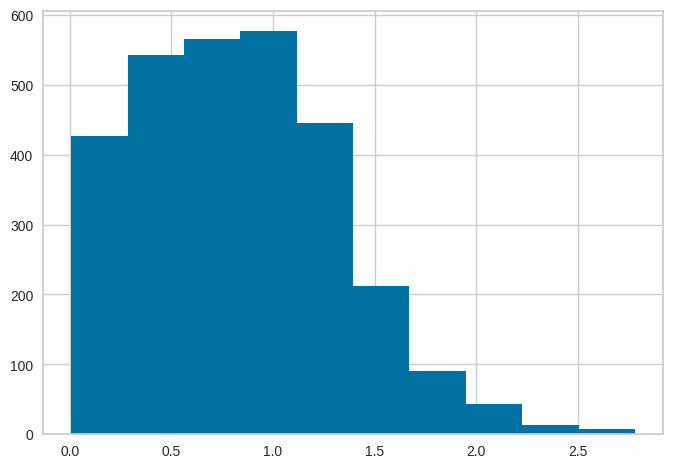

In [84]:
get_config('X_train')['Whole_weight'].hist()

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [85]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5182,4.6209,2.1471,0.5551,0.1523,0.1287,0.4250
rf,Random Forest Regressor,1.5419,4.7193,2.1701,0.5449,0.1546,0.1311,1.3250
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1552,0.1313,1.0430
et,Extra Trees Regressor,1.5556,4.7931,2.1878,0.5380,0.1557,0.1321,0.8640
br,Bayesian Ridge,1.5989,5.0220,2.2381,0.5163,0.1627,0.1367,0.0720
lr,Linear Regression,1.5997,5.0260,2.2390,0.5159,0.1634,0.1367,0.6070
huber,Huber Regressor,1.5654,5.0521,2.2461,0.5144,0.1599,0.1294,0.1220
ridge,Ridge Regression,1.6122,5.1642,2.2688,0.5034,0.1607,0.1373,0.1320
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1614,0.1360,0.2460
knn,K Neighbors Regressor,1.5938,5.2118,2.2821,0.4974,0.1618,0.1330,0.0860


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [86]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [88]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5182,4.6209,2.1471,0.5551,0.1523,0.1287,0.5300
rf,Random Forest Regressor,1.5419,4.7193,2.1701,0.5449,0.1546,0.1311,1.3460
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1552,0.1313,0.4770
et,Extra Trees Regressor,1.5556,4.7931,2.1878,0.5380,0.1557,0.1321,0.7690
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1614,0.1360,0.1940
dt,Decision Tree Regressor,2.0598,8.8865,2.9777,0.1424,0.2097,0.1735,0.1000


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [89]:
compare_tree_models

GradientBoostingRegressor(random_state=123)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [90]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5182,4.6209,2.1471,0.5551,0.1523,0.1287,0.530
rf,Random Forest Regressor,1.5419,4.7193,2.1701,0.5449,0.1546,0.1311,1.346
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1552,0.1313,0.477
et,Extra Trees Regressor,1.5556,4.7931,2.1878,0.5380,0.1557,0.1321,0.769
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1614,0.1360,0.194
dt,Decision Tree Regressor,2.0598,8.8865,2.9777,0.1424,0.2097,0.1735,0.100


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [91]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5182,4.6209,2.1471,0.5551,0.1523,0.1287,0.4550
rf,Random Forest Regressor,1.5419,4.7193,2.1701,0.5449,0.1546,0.1311,1.3410
lightgbm,Light Gradient Boosting Machine,1.5531,4.7962,2.1875,0.5382,0.1552,0.1313,0.9200
et,Extra Trees Regressor,1.5556,4.7931,2.1878,0.5380,0.1557,0.1321,0.7950
huber,Huber Regressor,1.5654,5.0521,2.2461,0.5144,0.1599,0.1294,0.1260
knn,K Neighbors Regressor,1.5938,5.2118,2.2821,0.4974,0.1618,0.1330,0.0870
br,Bayesian Ridge,1.5989,5.0220,2.2381,0.5163,0.1627,0.1367,0.0770
lr,Linear Regression,1.5997,5.0260,2.2390,0.5159,0.1634,0.1367,0.0840
xgboost,Extreme Gradient Boosting,1.6049,5.1626,2.2700,0.5024,0.1614,0.1360,0.1940
ridge,Ridge Regression,1.6122,5.1642,2.2688,0.5034,0.1607,0.1373,0.0850


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [92]:
# list of top 3 models by MAE
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 LGBMRegressor(n_jobs=-1, random_state=123)]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
# help(compare_models)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [96]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.1024,9.4334,3.0714,0.0894,0.2198,0.1838
1,2.0000,8.5734,2.9280,0.1688,0.2054,0.1686
2,2.1843,10.5461,3.2475,-0.0012,0.2210,0.1789
3,2.0959,8.7603,2.9598,0.2752,0.2093,0.1739
4,1.9247,7.9452,2.8187,0.2583,0.2007,0.1613
5,1.9281,7.2500,2.6926,0.2640,0.1972,0.1675
6,2.1815,9.0308,3.0051,-0.0673,0.2101,0.1828
7,2.0377,8.9486,2.9914,0.2185,0.2045,0.1658
8,2.0445,8.9829,2.9971,0.1553,0.2087,0.1747


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [97]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6109,5.5495,2.3557,0.4643,0.1729,0.1371
1,1.6485,6.0648,2.4627,0.4120,0.1724,0.1354
2,1.6962,6.7918,2.6061,0.3552,0.1753,0.1296
3,1.7021,6.0976,2.4693,0.4955,0.1722,0.1334
4,1.5634,5.2800,2.2978,0.5071,0.1603,0.1248
5,1.3990,4.3536,2.0865,0.5580,0.1500,0.1171
6,1.5103,4.9144,2.2168,0.4192,0.1626,0.1251
7,1.6353,6.5796,2.5651,0.4254,0.1722,0.1262
8,1.5719,6.3185,2.5137,0.4058,0.1732,0.1297


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [98]:
dt

DecisionTreeRegressor(random_state=123)

In [99]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6985,6.4541,2.5405,0.3770,0.1830,0.1511
1,1.7145,5.7783,2.4038,0.4398,0.1701,0.1446
2,1.7512,6.5911,2.5673,0.3743,0.1756,0.1425
3,1.6811,5.3889,2.3214,0.5541,0.1643,0.1383
4,1.5337,4.7422,2.1777,0.5573,0.1538,0.1278
5,1.5666,5.0187,2.2402,0.4905,0.1588,0.1345
6,1.6789,5.4960,2.3444,0.3505,0.1670,0.1421
7,1.6469,5.4194,2.3280,0.5267,0.1577,0.1349
8,1.7033,6.7758,2.6030,0.3628,0.1784,0.1462


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [100]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6109,5.5495,2.3557,0.4643,0.1729,0.1371
1,1.6485,6.0648,2.4627,0.4120,0.1724,0.1354
2,1.6962,6.7918,2.6061,0.3552,0.1753,0.1296
3,1.7021,6.0976,2.4693,0.4955,0.1722,0.1334
4,1.5634,5.2800,2.2978,0.5071,0.1603,0.1248
5,1.3990,4.3536,2.0865,0.5580,0.1500,0.1171
6,1.5103,4.9144,2.2168,0.4192,0.1626,0.1251
7,1.6353,6.5796,2.5651,0.4254,0.1722,0.1262
8,1.5719,6.3185,2.5137,0.4058,0.1732,0.1297


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [101]:
# model object
tuned_dt

DecisionTreeRegressor(criterion='absolute_error', max_depth=6, max_features=1.0,
                      min_impurity_decrease=0.002, min_samples_leaf=5,
                      min_samples_split=5, random_state=123)

In [102]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'Whole_weight',
                                                                          'Shucked_weight',
                                                                          'Viscera_weight',
                                                                          'Shell_weight'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=123, refit=False, scoring='r2', verbose=1)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

## ✅ Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [104]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6007,5.3464,2.3122,0.4839,0.1718,0.1441
1,1.6000,5.3427,2.3114,0.4820,0.1662,0.1385
2,1.6430,5.6844,2.3842,0.4603,0.1640,0.1340
3,1.6188,5.1442,2.2681,0.5744,0.1583,0.1319
4,1.5195,4.3822,2.0934,0.5909,0.1512,0.1281
5,1.5524,4.4251,2.1036,0.5508,0.1542,0.1350
6,1.6062,4.7079,2.1698,0.4436,0.1587,0.1371
7,1.6699,5.4538,2.3353,0.5237,0.1600,0.1379
8,1.6086,5.5331,2.3523,0.4797,0.1654,0.1397


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [105]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6280,6.1809,2.4861,0.4033,0.1811,0.1436
1,1.6007,5.6143,2.3695,0.4557,0.1692,0.1365
2,1.7031,6.3993,2.5297,0.3925,0.1735,0.1352
3,1.6027,5.5685,2.3598,0.5393,0.1654,0.1282
4,1.6301,5.5342,2.3525,0.4834,0.1705,0.1375
5,1.5274,4.6370,2.1534,0.5292,0.1577,0.1298
6,1.6644,5.4452,2.3335,0.3565,0.1687,0.1381
7,1.5445,5.0856,2.2551,0.5559,0.1577,0.1272
8,1.5445,5.9555,2.4404,0.4400,0.1675,0.1316


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(ensemble_model)

## ✅ Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [106]:
# top 3 models based on mae
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 LGBMRegressor(n_jobs=-1, random_state=123)]

In [107]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5078,4.5861,2.1415,0.5573,0.1587,0.1345
1,1.5559,4.8363,2.1992,0.5311,0.1566,0.1336
2,1.5620,5.1231,2.2634,0.5136,0.1551,0.1270
3,1.5384,4.5005,2.1214,0.6276,0.1480,0.1252
4,1.4054,3.9353,1.9838,0.6326,0.1407,0.1176
5,1.4005,3.7530,1.9373,0.6190,0.1412,0.1222
6,1.5483,4.3847,2.0940,0.4818,0.1544,0.1318
7,1.5558,4.8226,2.1960,0.5788,0.1513,0.1288
8,1.4903,5.0959,2.2574,0.5208,0.1571,0.1287


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- weights
- optimize
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(blend_models)

## ✅ Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [108]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5072,4.5046,2.1224,0.5652,0.1560,0.1332
1,1.5447,4.7337,2.1757,0.5410,0.1582,0.1338
2,1.5229,4.9946,2.2349,0.5258,0.1530,0.1245
3,1.5043,4.2927,2.0719,0.6448,0.1451,0.1235
4,1.4013,3.9200,1.9799,0.6341,0.1398,0.1168
5,1.4291,3.8227,1.9552,0.6119,0.1425,0.1236
6,1.5387,4.2771,2.0681,0.4945,0.1535,0.1314
7,1.5736,4.8203,2.1955,0.5790,0.1531,0.1307
8,1.4477,4.6782,2.1629,0.5601,0.1528,0.1265


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- restack
- optimize
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(stack_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

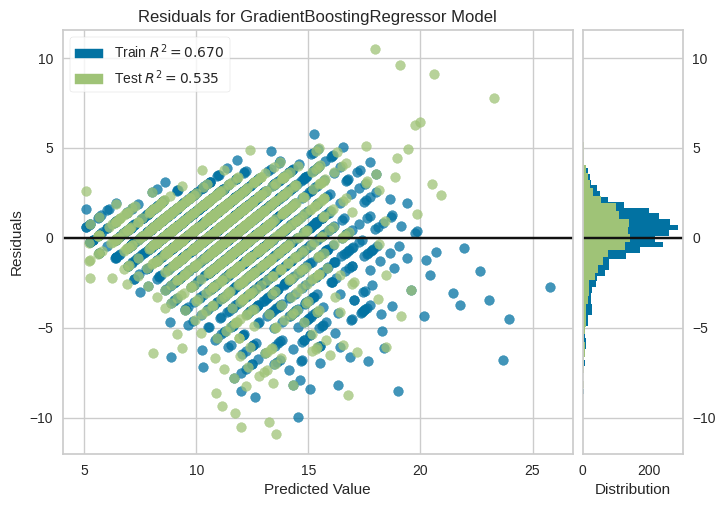

In [109]:
# plot residuals
plot_model(best, plot = 'residuals')

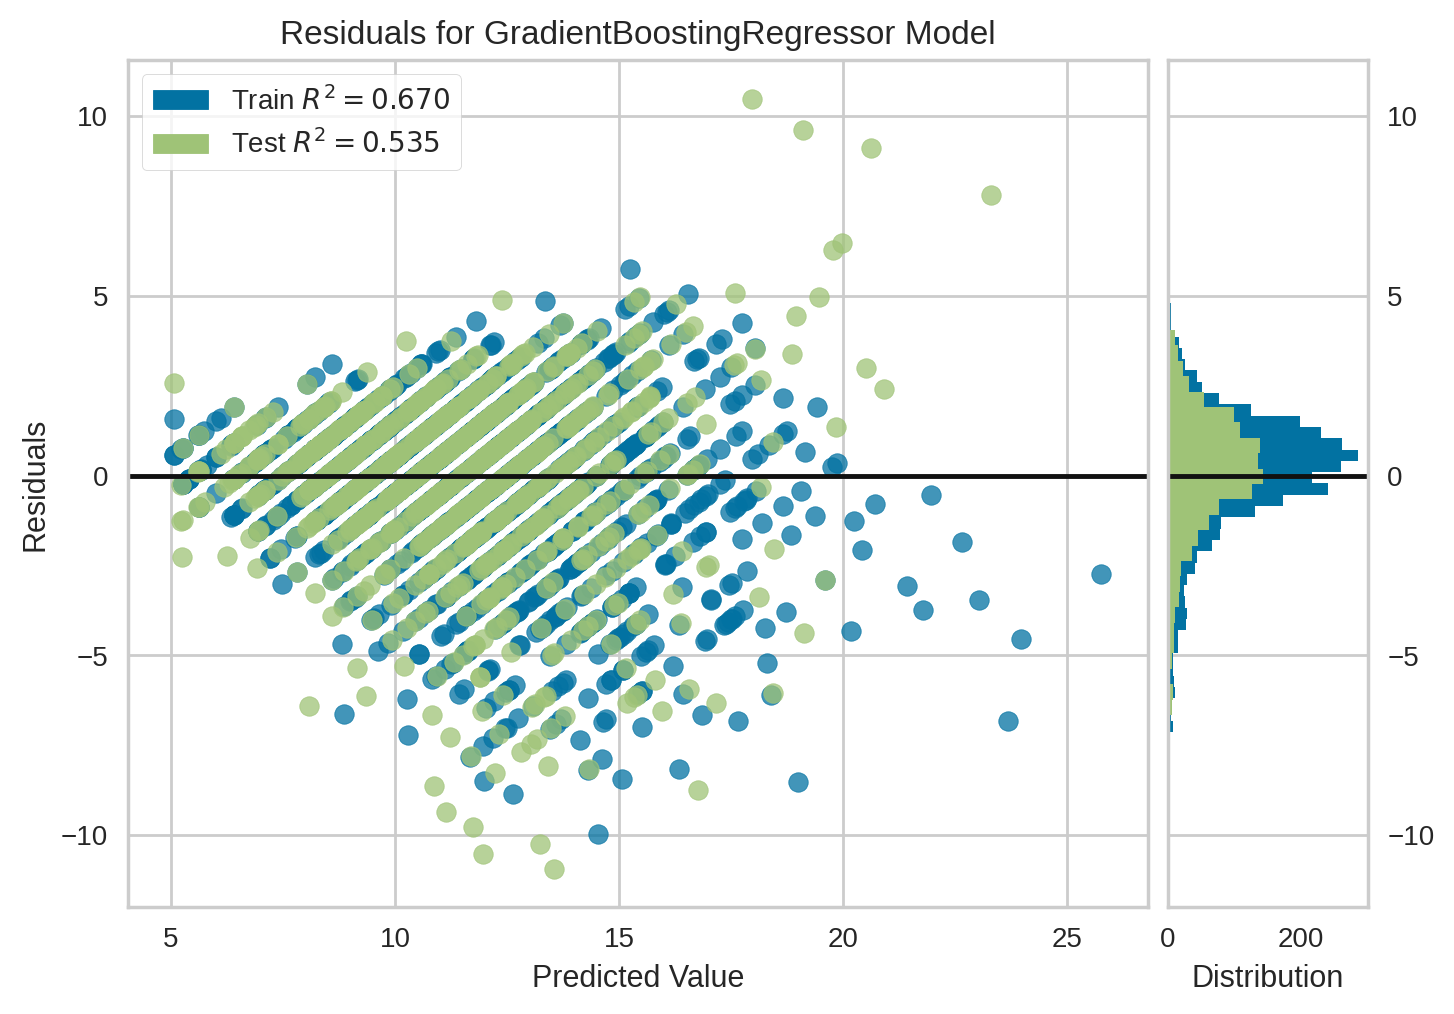

In [110]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [111]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [119]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['Length', 'Diamet...",1.5997,5.0260,2.2390,0.5159,0.1634,0.1367
1,Lasso Regression,"(TransformerWrapper(include=['Length', 'Diamet...",2.3643,10.4823,3.2344,-0.0037,0.2503,0.2206
2,Ridge Regression,"(TransformerWrapper(include=['Length', 'Diamet...",1.6122,5.1642,2.2688,0.5034,0.1607,0.1373
3,Elastic Net,"(TransformerWrapper(include=['Length', 'Diamet...",2.3266,10.1932,3.1893,0.0242,0.2463,0.2166
4,Least Angle Regression,"(TransformerWrapper(include=['Length', 'Diamet...",2.0611,11.1576,2.9572,-0.0874,0.2136,0.1801
5,Lasso Least Angle Regression,"(TransformerWrapper(include=['Length', 'Diamet...",2.3643,10.4823,3.2344,-0.0037,0.2503,0.2206
6,Orthogonal Matching Pursuit,"(TransformerWrapper(include=['Length', 'Diamet...",2.0954,8.4552,2.9040,0.1907,0.2182,0.1878
7,Bayesian Ridge,"(TransformerWrapper(include=['Length', 'Diamet...",1.5989,5.0220,2.2381,0.5163,0.1627,0.1367
8,Passive Aggressive Regressor,"(TransformerWrapper(include=['Length', 'Diamet...",2.2868,8.7664,2.9013,0.1617,0.2279,0.1970


In [120]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 T...
                ['trained_model',
                 StackingRegressor(cv=5,
                                   estimators=[('Gradient Boosting Regressor',
                                                GradientBoostingRegressor(random_state=123)),
                                               ('Random Forest Regressor',
                                                RandomForestRegressor(n_jobs=-1,
                                                                      random_state=123)),
                                               ('Light Gradient Boosting '
                                                'Machine',
                                                LGBMRegressor(n_jobs=-1,
                                                              random_state=123))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1, passthrough=True)]])

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [123]:
# find best model based on CV metrics
new_best_model = automl()

In [127]:
new_best_model

StackingRegressor(cv=5,
                  estimators=[('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [129]:
final_best = finalize_model(new_best_model)

In [130]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 T...
                ('actual_estimator',
                 StackingRegressor(cv=5,
                                   estimators=[('Gradient Boosting Regressor',
                                                GradientBoostingRegressor(random_state=123)),
                                               ('Random Forest Regressor',
                                                RandomForestRegressor(n_jobs=-1,
                                                                      random_state=123)),
                                               ('Light Gradient Boosting '
                                                'Machine',
                                                LGBMRegressor(n_jobs=-1,
                                                              random_state=123))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1, passthrough=True))])

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [132]:
# save model
save_model(new_best_model, 'kevin_abalone_model_2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Sex'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  T...
                 ('trained_model',
                  StackingRegressor(cv=5,
                                    estimators=[('Gradient Boosting Regressor',
                                                 GradientBoostingRegressor(random_state=123)),
                                                ('Random Forest Regressor',
                                       

In [133]:
# load model
loaded_from_disk = load_model('kevin_abalone_model_2')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Sex'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_...
                ('trained_model',
                 StackingRegressor(cv=5,
                                   estimators=[('Gradient Boosting Regressor',
                                                GradientBoostingRegressor(random_state=123)),
                                               ('Random Forest Regressor',
                                                RandomForestRegressor(n_jobs=-1,
                                                                      random_state=123)),
                                               ('Light Gradient Boosting '
                                                'Machine',
                                                LGBMRegressor(n_jobs=-1,
                                                              random_state=123))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1, passthrough=True))])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [134]:
# save experiment
save_experiment('my_experiment')

In [135]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,Age
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True
